In [1]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#loading dataset
data=pd.read_csv('Phishing_Legitimate_full.csv')

In [3]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# EDA

In [4]:
data.shape

(10000, 50)

In [5]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [6]:
data.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [7]:
#Finding the null values in the dataset
data.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


In [10]:
data.CLASS_LABEL.value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

Text(0, 0.5, 'Count')

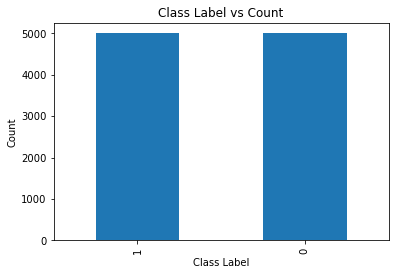

In [11]:
#Bar count plot for Class Label
data['CLASS_LABEL'].value_counts().plot(kind='bar')
plt.title('Class Label vs Count')
plt.xlabel('Class Label')
plt.ylabel('Count')

In [12]:
#performing Univariate analysis
def discrete_univariate_analysis(data, feature):
    total = len(data[feature])
    count = data[feature].nunique()
    plt.figure(figsize=(count+1, 5))
    plt.xticks(rotation = 90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette='flare', order = \
        data[feature].value_counts().index.sort_values(ascending = False))
    for p in ax.patches:
        label = "{:.1f}%".format(100*p.get_height()/total)
        x = p.get_x()+p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x,y), ha="center", va="center", size=12, xytext=(0,5), textcoords="offset points")
    plt.show()

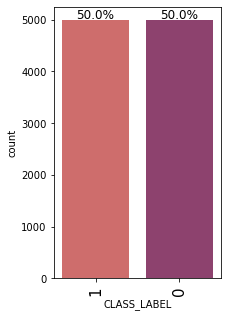

In [13]:
discrete_univariate_analysis(data, 'CLASS_LABEL')

In [14]:
#Bivariate analysis
def bivariate_analysis(data, feature_list):
    plt.figure(figsize=(15,10))
    for i, variable in enumerate(feature_list):
        plt.subplot(3,2, i+1)
        sns.boxplot(data['CLASS_LABEL'], data[variable], palette='viridis')
        plt.tight_layout()
        plt.title('Class Label vs '+variable)
    plt.show()

C:\Users\Mukta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mukta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mukta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mukta\anacond

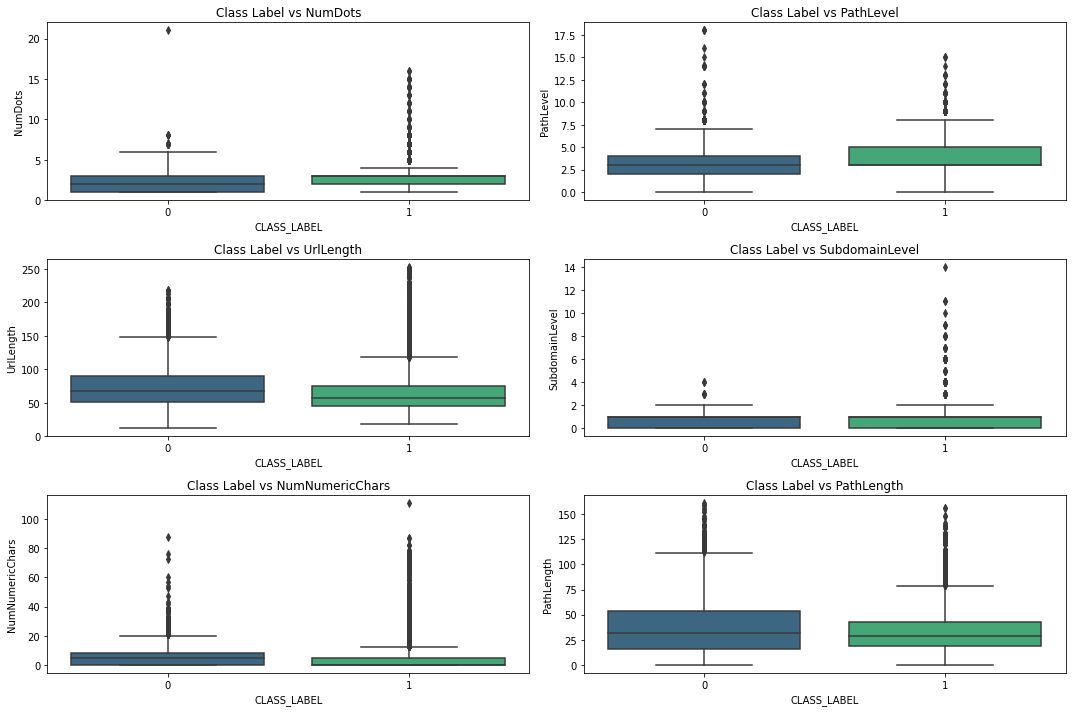

In [15]:
bivariate_analysis(data, ['NumDots','PathLevel','UrlLength','SubdomainLevel','NumNumericChars','PathLength'])

In [16]:
data.corr()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,1.000000,-0.238066,0.027976,-0.234909,-0.046967,0.231091,-0.107170,0.009916,-0.084148,0.024811,...,0.204099,-0.081004,0.000481,0.063732,-0.010836,-0.020932,-0.169502,-0.068570,0.465757,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,...,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,...,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,-0.234909,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,...,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,-0.046967,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,...,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,...,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,-0.107170,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,...,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.009916,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,...,-0.012422,-0.003160,-0.003067,0.003031,-0.007469,-0.006885,-0.004207,0.011307,0.013235,-0.017323
TildeSymbol,-0.084148,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,...,-0.039905,-0.011051,-0.020400,0.016614,-0.036087,0.022478,0.022098,0.058519,-0.000144,0.095864
NumUnderscore,0.024811,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,...,-0.010341,-0.019348,-0.019467,0.003353,-0.257480,0.014952,-0.053835,-0.047775,0.100214,-0.098869


In [17]:
def heatmap(data,start_index,end_index):
    new_data=pd.DataFrame(data.iloc[:,start_index:end_index])
    plt.figure(figsize=(10,8))
    sns.heatmap(new_data.corr(),annot=True,fmt='.2f')

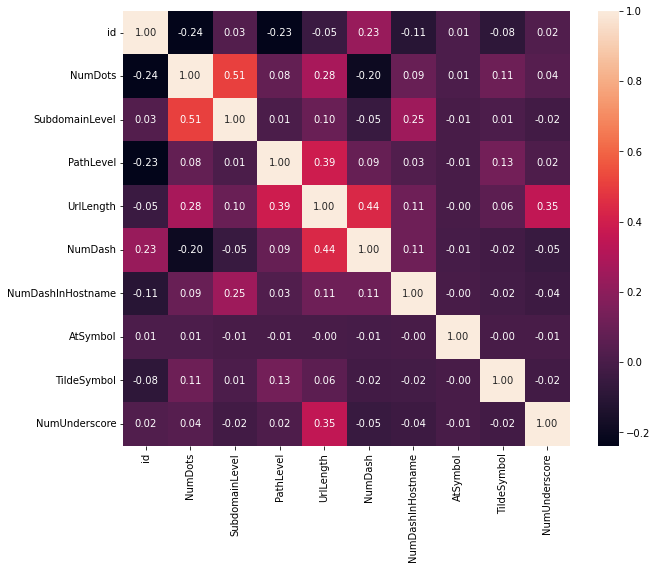

In [18]:
#Heatmap for first 10 columns
heatmap(data,0,10)

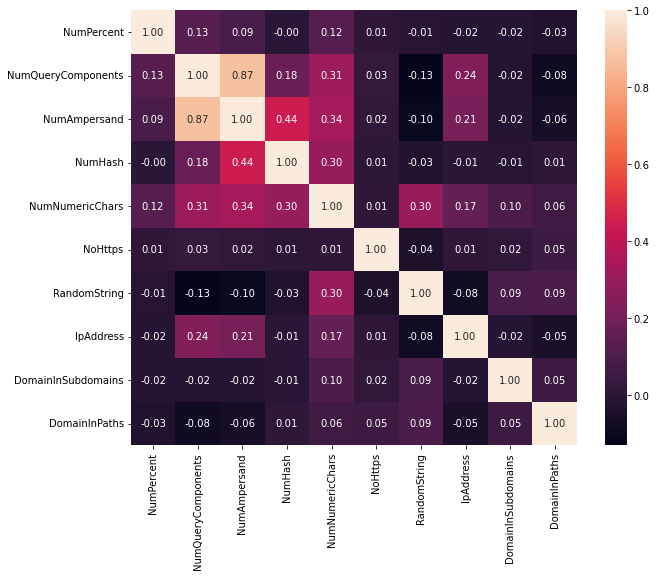

In [19]:
heatmap(data,10,20)

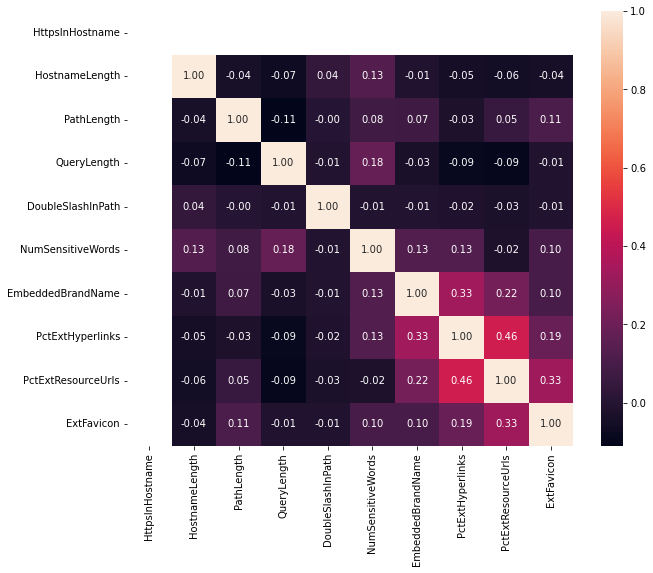

In [20]:
heatmap(data,20,30)

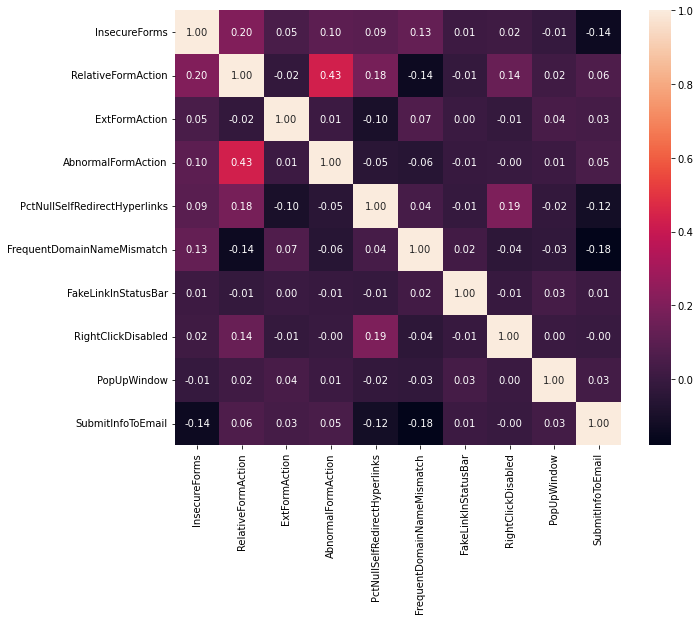

In [21]:
heatmap(data,30,40)

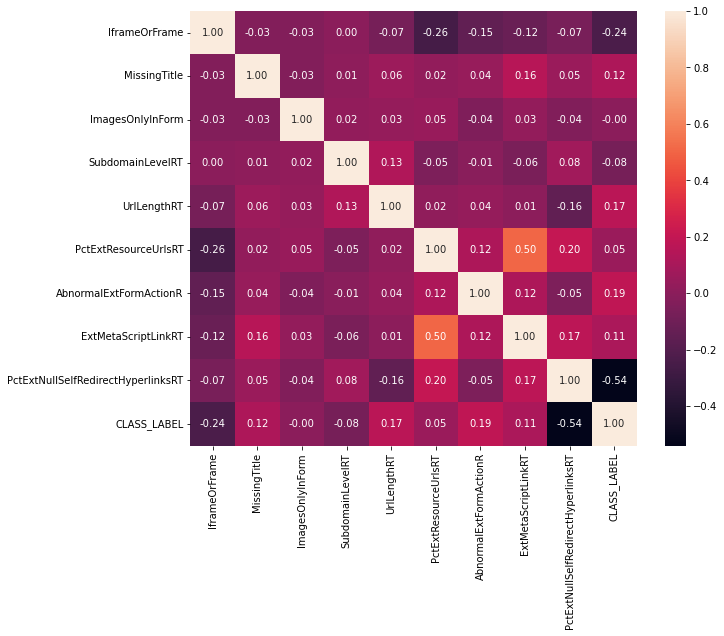

In [22]:
heatmap(data,40,50)

# Splitting dataset into training and testing dataset
Dividing the dataset into training and testing dataset such that Training Data=70% and Testing Data=30%

In [23]:
x=data.drop(columns=['id','CLASS_LABEL'],axis=1)
y=data['CLASS_LABEL']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
x_train

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
9069,2,0,5,56,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,-1
2603,4,0,2,71,0,0,0,0,0,0,...,0,1,0,0,1,0,-1,1,-1,-1
7738,3,1,3,71,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,1
1579,2,0,1,34,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,1,-1
5058,2,1,0,24,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,0,1,60,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
5191,3,1,2,116,1,0,0,0,2,1,...,0,0,0,0,1,-1,1,1,1,1
5390,1,0,5,60,1,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
860,2,0,3,50,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,-1,1


In [26]:
x_test

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
6252,1,0,3,60,5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4684,3,1,5,75,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,-1
1731,1,0,3,64,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
4742,3,0,4,71,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,-1,1
4521,3,1,2,52,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,2,0,4,62,4,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,1
1074,2,0,3,38,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
3063,3,1,3,60,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,1,1
6487,1,0,3,74,2,0,0,0,1,0,...,0,1,0,0,1,0,-1,1,0,1


In [27]:
y_train

9069    0
2603    1
7738    0
1579    1
5058    0
       ..
5734    0
5191    0
5390    0
860     1
7270    0
Name: CLASS_LABEL, Length: 7000, dtype: int64

In [28]:
y_test

6252    0
4684    1
1731    1
4742    1
4521    1
       ..
8014    0
1074    1
3063    1
6487    0
4705    1
Name: CLASS_LABEL, Length: 3000, dtype: int64

# XGBoost

In [29]:
#model using XGBoost Classifier
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
#predicting the values for corresponding x_test
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [31]:
#predicting the values for corresponding x_train
y_pred_train=model.predict(x_train)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,recall_score,precision_score,accuracy_score
mean_absolute_error(y_test,y_pred)

0.013

In [33]:
#MSE value
mean_squared_error(y_test,y_pred)

0.013

In [34]:
#RMSE value
mean_squared_error(y_test,y_pred,squared=False)

0.11401754250991379

In [35]:
#Recall
recall_score(y_test,y_pred)

0.9882888744307091

In [36]:
#Precision
precision_score(y_test,y_pred)

0.9863636363636363

In [37]:
#Accuracy
accuracy_score(y_test,y_pred)

0.987

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1442,   21],
       [  18, 1519]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1463
           1       0.99      0.99      0.99      1537

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [40]:
#Accuracy for training data
accuracy_score(y_train,y_pred_train)

1.0

In [41]:
confusion_matrix(y_train,y_pred_train)

array([[3537,    0],
       [   0, 3463]], dtype=int64)

# Random Forest Classification

In [42]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [43]:
#model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [44]:
y_pred1=classifier.predict(x_test)
y_pred1_train=classifier.predict(x_train)

In [45]:
confusion_matrix(y_test,y_pred1)

array([[1441,   22],
       [  32, 1505]], dtype=int64)

In [46]:
recall_score(y_test,y_pred1)

0.9791802212101497

In [47]:
precision_score(y_test,y_pred1)

0.9855926653569089

In [48]:
mean_absolute_error(y_test,y_pred1)

0.018

In [49]:
mean_squared_error(y_test,y_pred1)

0.018

In [50]:
mean_squared_error(y_test,y_pred1,squared=False)

0.1341640786499874

In [51]:
accuracy_score(y_test,y_pred1)

0.982

In [52]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1463
           1       0.99      0.98      0.98      1537

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [53]:
accuracy_score(y_train,y_pred1_train)

1.0

In [54]:
confusion_matrix(y_train,y_pred1_train)

array([[3537,    0],
       [   0, 3463]], dtype=int64)

# Logisitic Regression

In [55]:
#model using Logistic Regression
from sklearn.linear_model import LogisticRegression
cl= LogisticRegression(random_state = 0)
cl.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred2=cl.predict(x_test)
y_pred2_train=cl.predict(x_train)

In [57]:
confusion_matrix(y_test,y_pred2)

array([[1373,   90],
       [  78, 1459]], dtype=int64)

In [58]:
recall_score(y_test,y_pred2)

0.9492517891997397

In [59]:
precision_score(y_test,y_pred2)

0.9418979987088444

In [60]:
mean_absolute_error(y_test,y_pred2)

0.056

In [61]:
mean_squared_error(y_test,y_pred2)

0.056

In [62]:
mean_squared_error(y_test,y_pred2,squared=False)

0.23664319132398465

In [63]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1463
           1       0.94      0.95      0.95      1537

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [64]:
accuracy_score(y_test,y_pred2)

0.944

In [65]:
accuracy_score(y_train,y_pred2_train)

0.9462857142857143

In [66]:
confusion_matrix(y_train,y_pred2_train)

array([[3322,  215],
       [ 161, 3302]], dtype=int64)